In [1]:
import tensorflow as tf

In [2]:
print(f"TensorFlow (v{tf.version.VERSION})")

TensorFlow (v2.6.0)


# Sequential model

In [3]:
sequential_model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation='relu', name='layer_1', input_shape=(20,)),
        tf.keras.layers.Dense(5, activation='tanh', name='layer_2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='layer_3'),
    ],
    name="sequential_model_1"
)

sequential_model_1.summary()

Model: "sequential_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                210       
_________________________________________________________________
layer_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


### or

In [4]:
sequential_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer((20,)),
        tf.keras.layers.Dense(10, activation='relu', name='layer_1'),
        tf.keras.layers.Dense(5, activation='tanh', name='layer_2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='layer_3'),
    ],
    name="sequential_model_2"
)

sequential_model_2.summary()

Model: "sequential_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                210       
_________________________________________________________________
layer_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


### or

In [5]:
sequential_model_3 = tf.keras.Sequential(name="sequential_model_3")
sequential_model_3.add(tf.keras.layers.Dense(10, activation='relu', name='layer_1', input_shape=(20,)))
sequential_model_3.add(tf.keras.layers.Dense(5, activation='tanh', name='layer_2'))
sequential_model_3.add(tf.keras.layers.Dense(1, activation='sigmoid', name='layer_3'))
sequential_model_3.summary()

Model: "sequential_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                210       
_________________________________________________________________
layer_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


### or

In [6]:
sequential_model_4 = tf.keras.Sequential(name="sequential_model_4")
sequential_model_4.add(tf.keras.layers.InputLayer((20,)))
sequential_model_4.add(tf.keras.layers.Dense(10, activation='relu', name='layer_1'))
sequential_model_4.add(tf.keras.layers.Dense(5, activation='tanh', name='layer_2'))
sequential_model_4.add(tf.keras.layers.Dense(1, activation='sigmoid', name='layer_3'))
sequential_model_4.summary()

Model: "sequential_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                210       
_________________________________________________________________
layer_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


# Functional API

In [7]:
inputs = tf.keras.Input((20,))
outputs = tf.keras.layers.Dense(10, activation='relu', name='layer_1')(inputs)
outputs = tf.keras.layers.Dense(5, activation="tanh", name="layer_2")(outputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='layer_3')(outputs)
sequential_model_5 = tf.keras.Model(inputs, outputs)

sequential_model_5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
layer_1 (Dense)              (None, 10)                210       
_________________________________________________________________
layer_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
layer_3 (Dense)              (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [8]:
inputs.shape

TensorShape([None, 20])

In [9]:
inputs.dtype

tf.float32

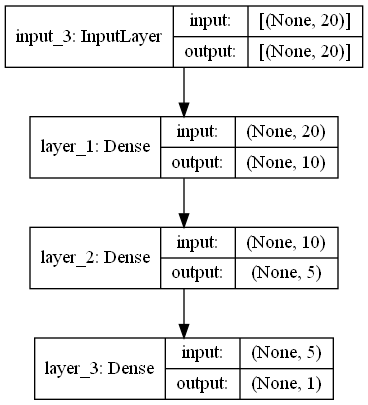

In [10]:
tf.keras.utils.plot_model(sequential_model_5, show_shapes=True)

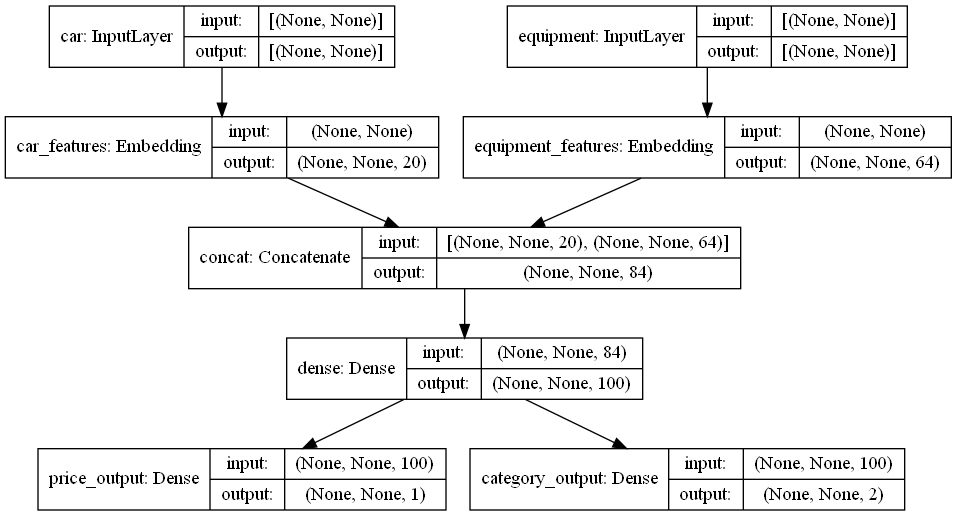

In [11]:
car_input = tf.keras.Input(shape=(None,), name="car")
equipment_input = tf.keras.Input(shape=(None,), name="equipment")

car_features = tf.keras.layers.Embedding(1000, 20, name="car_features")(car_input)
equipment_features = tf.keras.layers.Embedding(10000, 64, name="equipment_features")(equipment_input)

concat = tf.keras.layers.concatenate([car_features, equipment_features], name="concat")

x = tf.keras.layers.Dense(100, activation='relu')(concat)
price_output = tf.keras.layers.Dense(1, name="price_output")(x)
category_output = tf.keras.layers.Dense(2, activation="softmax", name="category_output")(x)

multiple_inputs_model = tf.keras.Model(
    inputs=[car_input, equipment_input],
    outputs=[price_output, category_output]
)

tf.keras.utils.plot_model(multiple_inputs_model, show_shapes=True)

In [12]:
multiple_inputs_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
car (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
equipment (InputLayer)          [(None, None)]       0                                            
__________________________________________________________________________________________________
car_features (Embedding)        (None, None, 20)     20000       car[0][0]                        
__________________________________________________________________________________________________
equipment_features (Embedding)  (None, None, 64)     640000      equipment[0][0]                  
____________________________________________________________________________________________

In [13]:
multiple_inputs_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=[
        tf.keras.losses.MeanSquaredError(),
        tf.keras.losses.SparseCategoricalCrossentropy(),
    ],
    loss_weights=[1.0, 0.7]
)

### or

In [14]:
multiple_inputs_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss={
        "price_output": tf.keras.losses.MeanSquaredError(),
        "category_output": tf.keras.losses.SparseCategoricalCrossentropy(),
    },
    loss_weights={
        "price_output": 1.0,
        "category_output": 0.7
    }
)